In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/New dataset
%cd car-resale/

/content/gdrive/MyDrive/New dataset
/content/gdrive/MyDrive/New dataset/car-resale


In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
df1 = pd.read_csv('Car details v3.csv')
df1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [5]:
df1.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [6]:
df2 = df1.drop('torque', axis=1)

In [7]:
df2.shape

(8128, 12)

In [8]:
df = df2.dropna()

In [9]:
df['year']= 2023-df['year']

<ipython-input-9-f83d3c66fb49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year']= 2023-df['year']


In [10]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,9,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,9,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,17,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,13,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,16,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,10,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,16,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0
8125,Maruti Swift Dzire ZDi,14,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,Tata Indigo CR4,10,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0


In [11]:
df['Manufacturer'] = df['name'].str.split().str.get(0)


<ipython-input-11-63f19d191a2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Manufacturer'] = df['name'].str.split().str.get(0)


In [ ]:
df['mileage'] = df['mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
df['engine'] = df['engine'].str.split(' ').str[0].astype(float)
df['max_power 1'] = df['max_power'].str.split(' ').str[0].astype(float)

In [17]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Manufacturer
0,Maruti Swift Dzire VDI,9,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74 bhp,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,9,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52 bhp,5.0,Skoda
2,Honda City 2017-2020 EXi,17,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78 bhp,5.0,Honda
3,Hyundai i20 Sportz Diesel,13,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90 bhp,5.0,Hyundai
4,Maruti Swift VXI BSIII,16,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2 bhp,5.0,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,10,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85 bhp,5.0,Hyundai
8124,Hyundai Verna CRDi SX,16,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110 bhp,5.0,Hyundai
8125,Maruti Swift Dzire ZDi,14,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9 bhp,5.0,Maruti
8126,Tata Indigo CR4,10,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70 bhp,5.0,Tata


In [18]:
df.describe()

,year,selling_price,km_driven,mileage,engine,seats
count,7907.000000,7.907000e+03,7.907000e+03,7907.000000,7907.000000,7907.000000
mean,9.017832,6.497417e+05,6.919256e+04,19.418783,1458.625016,5.416719
std,3.866650,8.135565e+05,5.678976e+04,4.037145,503.916303,0.959588
min,3.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,6.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,8.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,11.000000,6.900000e+05,9.575000e+04,22.320000,1582.000000,5.000000
max,29.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7907 non-null   object 
 1   year           7907 non-null   int64  
 2   selling_price  7907 non-null   int64  
 3   km_driven      7907 non-null   int64  
 4   fuel           7907 non-null   object 
 5   seller_type    7907 non-null   object 
 6   transmission   7907 non-null   object 
 7   owner          7907 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7907 non-null   object 
 11  seats          7907 non-null   float64
 12  Manufacturer   7907 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 864.8+ KB


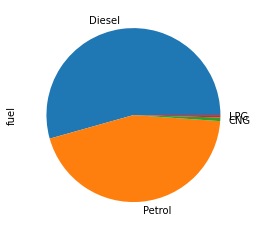

In [21]:
x = df.fuel.value_counts()
ax = x.plot(kind = 'pie')

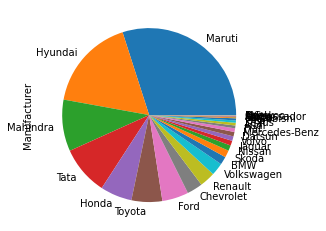

In [22]:
y = df.Manufacturer.value_counts()
ax = y.plot(kind = 'pie')

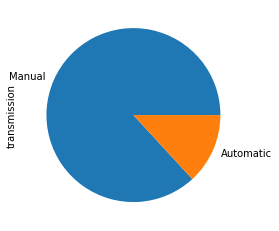

In [23]:
z = df.transmission.value_counts()
ax = z.plot(kind = 'pie')

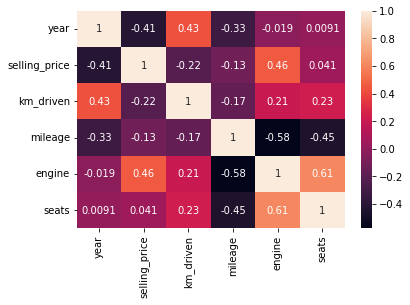

In [24]:
a = df.corr()
corrplot = sns.heatmap(a, annot = True)

plt.show()

In [25]:
a

,year,selling_price,km_driven,mileage,engine,seats
year,1.000000,-0.412268,0.428434,-0.329145,-0.018848,0.009144
selling_price,-0.412268,1.000000,-0.222196,-0.126054,0.455734,0.041358
km_driven,0.428434,-0.222196,1.000000,-0.173073,0.205914,0.227336
mileage,-0.329145,-0.126054,-0.173073,1.000000,-0.575831,-0.452085
engine,-0.018848,0.455734,0.205914,-0.575831,1.000000,0.610309
seats,0.009144,0.041358,0.227336,-0.452085,0.610309,1.000000


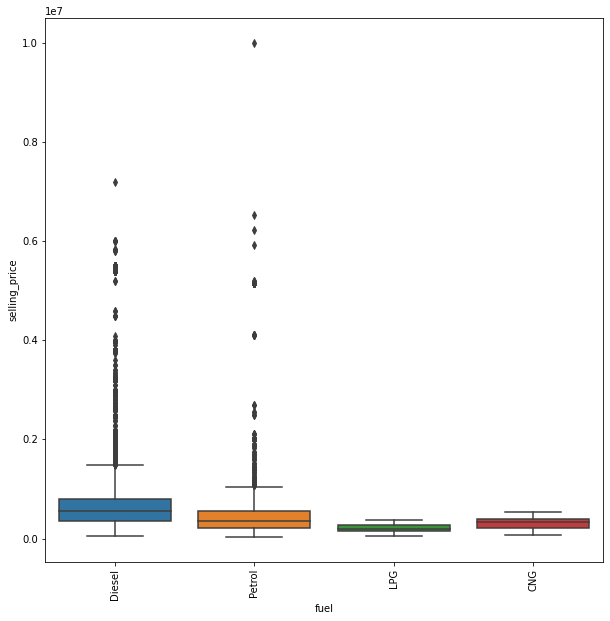

In [26]:

fig = plt.figure(figsize=(10, 10))
sns.boxplot(data=df, x='fuel', y='selling_price')
plt.xticks(rotation=90)
plt.show()

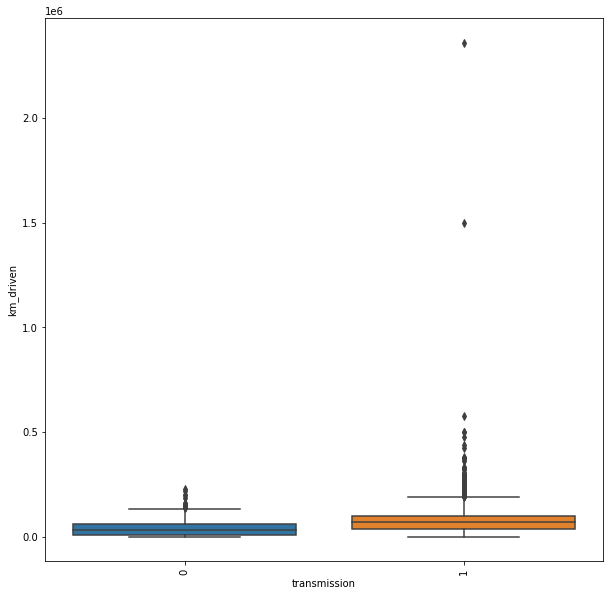

In [33]:

fig = plt.figure(figsize=(10, 10))
sns.boxplot(data=df, x='transmission', y='km_driven')
plt.xticks(rotation=90)
plt.show()

In [44]:
cols = ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'Manufacturer', 'max_power']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df.head()


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Manufacturer
0,1250,9,450000,145500,1,1,1,0,23.40,1248.0,243,5.0,20
1,1547,9,370000,120000,1,1,1,2,21.14,1498.0,14,5.0,26
2,375,17,158000,140000,3,1,1,4,17.70,1497.0,252,5.0,10
3,743,13,225000,127000,1,1,1,0,23.00,1396.0,296,5.0,11
4,1291,16,130000,120000,3,1,1,0,16.10,1298.0,287,5.0,20


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7907 non-null   int64  
 1   year           7907 non-null   int64  
 2   selling_price  7907 non-null   int64  
 3   km_driven      7907 non-null   int64  
 4   fuel           7907 non-null   int64  
 5   seller_type    7907 non-null   int64  
 6   transmission   7907 non-null   int64  
 7   owner          7907 non-null   int64  
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7907 non-null   int64  
 11  seats          7907 non-null   float64
 12  Manufacturer   7907 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 1.1 MB


In [47]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [61]:
poly = PolynomialFeatures(degree=3, include_bias=False)

In [63]:
poly_reg_model = LinearRegression()

In [64]:
poly_reg_model.fit(X_train, y_train)

LinearRegression()

In [65]:
y_predicted = poly_reg_model.predict(X_test)

In [66]:
mean_squared_error(y_test, y_predicted)

297608174334.42224

In [55]:
model = AdaBoostRegressor()

In [56]:
model.fit(X_train, y_train)

AdaBoostRegressor()

In [58]:
y_pred = model.predict(X_test)

In [59]:
mean_squared_error(y_test, y_pred)

124164558749.65149

In [52]:
r2_score(y_test, y_pred)

0.9779294647972597

In [67]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [68]:
y_pred = regressor.predict(X_test)

In [69]:
mean_squared_error(y_test, y_pred)

788938382867.927

In [72]:
model1 = XGBRegressor()
model1.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [74]:
y_pred1= model1.predict(X_test)
r2_score(y_test, y_pred1)

0.9857092912125147